# Test filtering of output grids

In [1]:
import numpy as np  # Grids are stored as NumPy Arrays
import gasp         # GASP is what we're testing

Found 1 CUDA devices in this system
Device 0 : Quadro P2000
Number of SMs       : 8
Max SHMEM per block : 48 KB
Max Opt in shared   : 48 KB
Recommended ngrids  : 1024

Estimated largest L for shared memory code path : 109
(Assumes threadsPerBlock = 32)

Using CUDA device : 0


In [2]:
%%time

L = 64
ngrids = 4*gasp.gpu_nsms*32
nsweeps = 5000
beta = 0.54
h = 0.07

grid_output_int = 100 # Should be a multiple of mag_output_int (not enforced?)
mag_output_int  = 100 # Note that the collective variable (be it magnetisation or cluster size) is computed only at this interval

frac = gasp.run_nucleation_swarm(L, ngrids, nsweeps, beta, h, 
                                 grid_output_int = grid_output_int,
                                 mag_output_int=mag_output_int, 
                                 cv="magnetisation",                    # Thresholds apply to magnetisation
                                 dn_threshold=-0.85, up_threshold=0.2,  # Used for filtering as well as trajectory fate
                                 keep_grids=True,                       # Store grids in memory as gasp.grids list
                                 max_keep_grids=nsweeps*ngrids//2);     # Maximum grids to allocate space for

 Sweep :       4900, Reached cv =   0.20 :  468 , Unresolved :  556
CPU times: user 2.39 s, sys: 550 ms, total: 2.94 s
Wall time: 9.02 s


In [3]:
print("Number of snapshots are which grids were stored :", len(gasp.grids), "out of ", nsweeps//grid_output_int, "sampled")

tot_grids = 0
for snaps in gasp.grids:
    tot_grids += len(snaps)
print("Total number of grids stored :", tot_grids, "out of ", nsweeps*ngrids//grid_output_int, "sampled")

Number of snapshots are which grids were stored : 49 out of  50 sampled
Total number of grids stored : 2887 out of  51200 sampled


In [4]:
# Magnetisation should still be stored at every mag_output_int regardless of filtering
nsweeps//mag_output_int  == len(gasp.magnetisation)

True

In [5]:
len(frac)
nsweeps//mag_output_int
len(gasp.magnetisation)

50

In [6]:
gasp.grids[0][0].grid

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

Most probable magnetisation in metastable state :  -0.9400000000000001


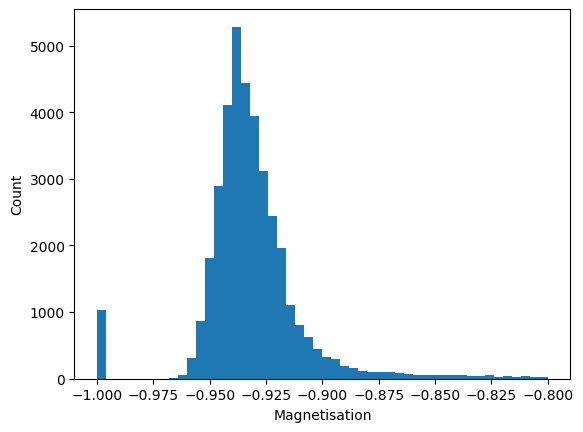

In [7]:
# Check that we're getting magnetisation at all output times
import matplotlib.pyplot as plt

# What is the distribution of magnetisation in the initial (metastable) state?
all_mag = [m for ml in gasp.magnetisation for m in ml]

plt.xlabel("Magnetisation")
plt.ylabel("Count")
n, bins, _ = plt.hist(all_mag, range=(-1,-0.8), bins=50)
print("Most probable magnetisation in metastable state : ", bins[np.argmax(n)])

# Set this as the dn_threshold for committor calcs
dn_thr = bins[np.argmax(n)]

magnetisaion :  -0.74658203125
magnetisaion :  -0.74658203125
magnetisaion :  -0.74658203125


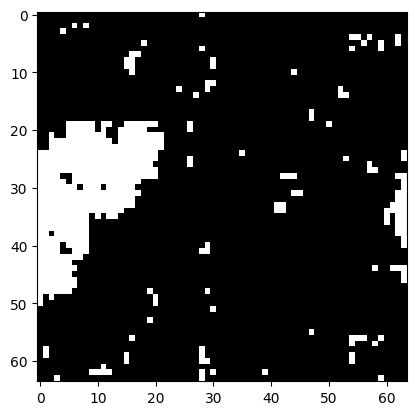

In [8]:
# Visualise a random grid at a random sweep
isnap = np.random.randint(0, len(gasp.grids))
igrid = np.random.randint(0, len(gasp.grids[isnap]))
grid_data = np.array(gasp.grids[isnap][igrid].grid)

plt.imshow(grid_data, cmap='grey')                         
print("magnetisaion : ", gasp.grids[isnap][igrid].magnetisation)           # Magnetisation stored as property of grid

jsweep = gasp.grids[isnap][igrid].isweep//mag_output_int
jgrid  = gasp.grids[isnap][igrid].igrid
print("magnetisaion : ", gasp.magnetisation[jsweep][jgrid])                # Entry in magnetisation list corresponding to this grid
print("magnetisaion : ", np.sum(gasp.grids[isnap][igrid].grid)/(L*L))      # Magnetisation computed from this grid

In [10]:
# Run a case which uses largest cluster size

L = 64
ngrids = 4*gasp.gpu_nsms*32
nsweeps = 5000
beta = 0.54
h = 0.07

grid_output_int = 100 # Should be a multiple of mag_output_int (not enforced?)
mag_output_int  = 100 # Note that the collective variable (be it magnetisation or cluster size) is computed only at this interval

frac = gasp.run_nucleation_swarm(L, ngrids, nsweeps, beta, h, 
                                 grid_output_int = grid_output_int,
                                 mag_output_int=mag_output_int, 
                                 cv="largest_cluster",                  # Thresholds apply to magnetisation
                                 dn_threshold=-7.5, up_threshold=1000,  # Used for filtering as well as trajectory fate
                                 keep_grids=True,                       # Store grids in memory as gasp.grids list
                                 max_keep_grids=nsweeps*ngrids//2);     # Maximum grids to allocate space for

 Sweep :       4900, Reached cv = 1000.00 :  476 , Unresolved :  548


In [11]:
print("Number of snapshots are which grids were stored :", len(gasp.grids), "out of ", nsweeps//grid_output_int, "sampled")

tot_grids = 0
for snaps in gasp.grids:
    tot_grids += len(snaps)
print("Total number of grids stored :", tot_grids, "out of ", nsweeps*ngrids//grid_output_int, "sampled")

Number of snapshots are which grids were stored : 50 out of  50 sampled
Total number of grids stored : 39274 out of  51200 sampled
